Further exploratory analysis, with a focus on the time series aspect of the data.

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set()

# Importing from my own modules
import sys
sys.path.append('../financial_forecasting/')
from utils import load_data

# Load the data

In [15]:
df_train, df_test = load_data()

Note: The competition organisers have created the train and test data by randomly splitting on `Day`. Will join the train and test data for the purpose of examining the time series element of the data.

In [16]:
df_train['is_testing_data'] = 0
df_test['is_testing_data'] = 1
df = pd.concat([df_train,df_test])

# Confirm that train and test do not share any common days

In [17]:
set(df_train.Day.unique()).intersection(df_test.Day.unique())

set()

# Does each stock only get traded on one market?

In [18]:
df.groupby('Stock')['Market'].nunique().value_counts()

1    3023
Name: Market, dtype: int64

Yes! So grouping by both market and stock simultaneously is redundant.

# Examine days

In [19]:
df.sort_values(by='Day').Day.unique()

array([  1,   2,   5,   6,   7,   8,   9,  12,  13,  14,  15,  16,  19,
        20,  21,  22,  23,  26,  27,  28,  29,  30,  33,  34,  35,  36,
        37,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  54,  55,
        56,  57,  58,  61,  62,  63,  64,  65,  68,  69,  70,  71,  72,
        75,  76,  77,  78,  79,  82,  83,  84,  85,  86,  89,  90,  91,
        92,  93,  96,  97,  98,  99, 100, 103, 104, 105, 106, 110, 111,
       112, 113, 114, 117, 118, 119, 120, 121, 124, 125, 126, 127, 128,
       131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 145, 146, 147,
       148, 149, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 166,
       167, 168, 169, 170, 173, 174, 175, 176, 177, 180, 181, 182, 183,
       184, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 201, 202,
       203, 204, 205, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219,
       222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 236, 237, 238,
       239, 240, 243, 244, 245, 246, 247, 250, 251, 252, 253, 25

Weekday trading with weekends of no trading are obvious here. This suggests we can compute sensible metrics for other features like the difference in variables from one day to another.

# Are all stocks present every day?

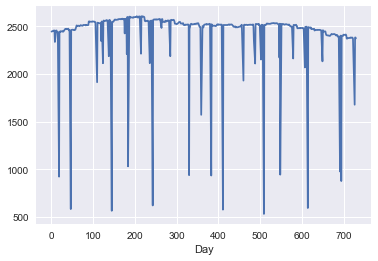

In [20]:
df.groupby('Day')['Stock'].nunique().plot()

No. Could use the suddent dips as an additional features? Or the number of stocks traded on a day as a new feature?

# Is a stock present more than once per day?

In [21]:
(df.groupby('Day')['Stock'].size() - df.groupby('Day')['Stock'].nunique()).any()

False

Nope. A stock is only present once per day.

# Examine behaviour of features in time

x0...x3E: Predictors that relate to the observed behaviour of the instrument on the day in question. The features labelled 'x3A', 'x3B', etc. are strongly related and might be expected to be highly correlated.


x4...x6: Predictors that describe the ‘typical’ behaviour that we would expect of the instrument on that day.

Hypothesis 1: x4 ... x6 are averages of some underlying quantitiy - We should see less variance in them than x0...x3E

In [22]:
def compute_log_feats(df, features):
    """
    Creates log transform of input features and appends them to the dataframe
    """
    for feat in features:
        df[feat + '_log10'] = np.log10(df[feat])
        
    return df

In [23]:
features = [feat for feat in df_train.columns if 'x' in feat]
df = compute_log_feats(df_train, features=features)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

/Users/km1308/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


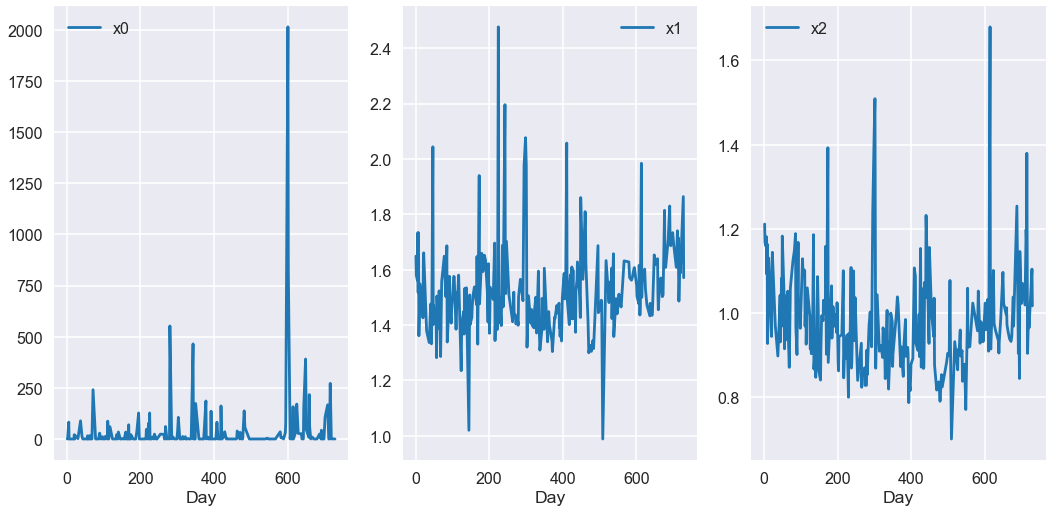

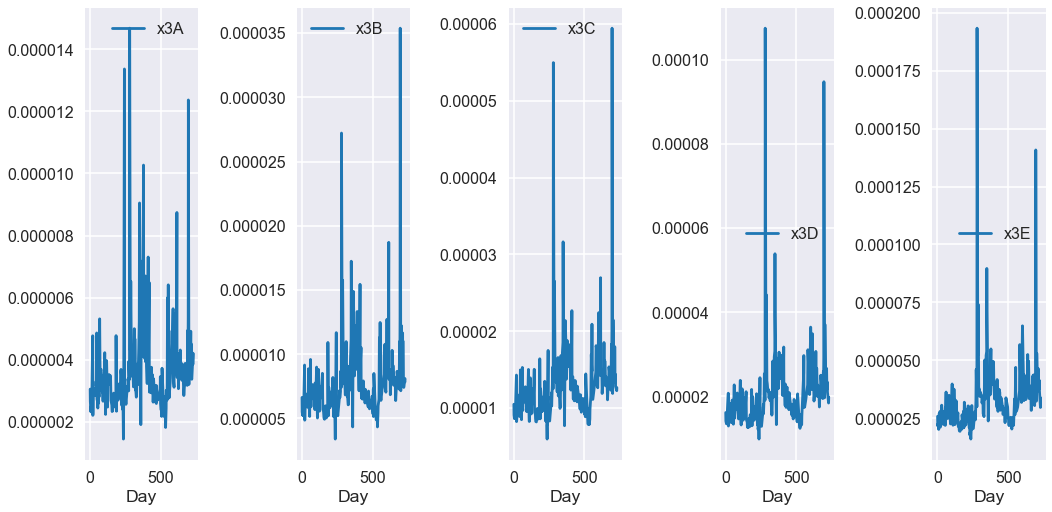

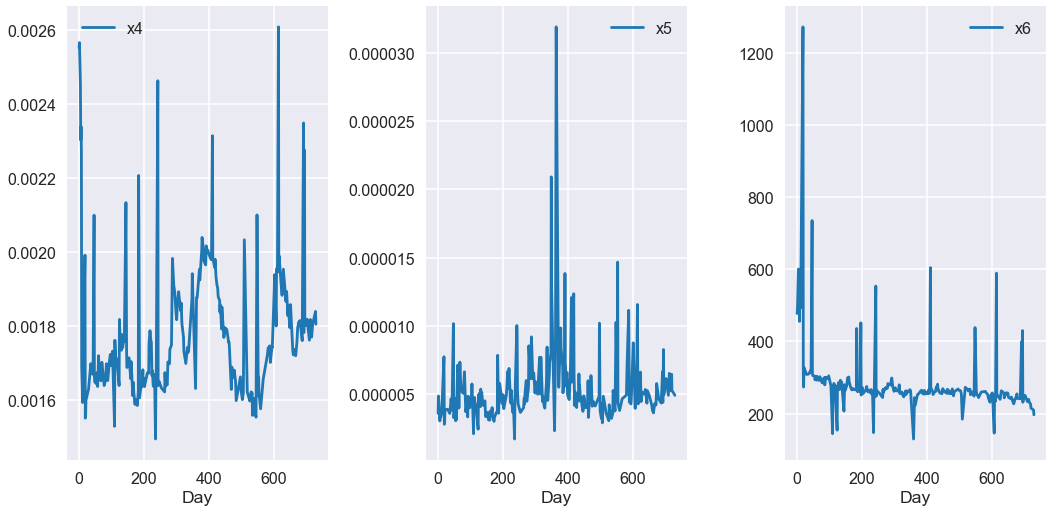

In [84]:
fig,ax = plt.subplots(nrows=1, ncols=len(feat_1), figsize=[15,7.5])
for ix, feat in enumerate(feat_1):
    df.groupby('Day').mean().plot(y=feat, ax=ax[ix])
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_2), figsize=[15,7.5])
for ix, feat in enumerate(feat_2):
    df.groupby('Day').mean().plot(y=feat, ax=ax[ix])
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_3), figsize=[15,7.5])
for ix, feat in enumerate(feat_3):
    df.groupby('Day').mean().plot(y=feat, ax=ax[ix])
fig.tight_layout()

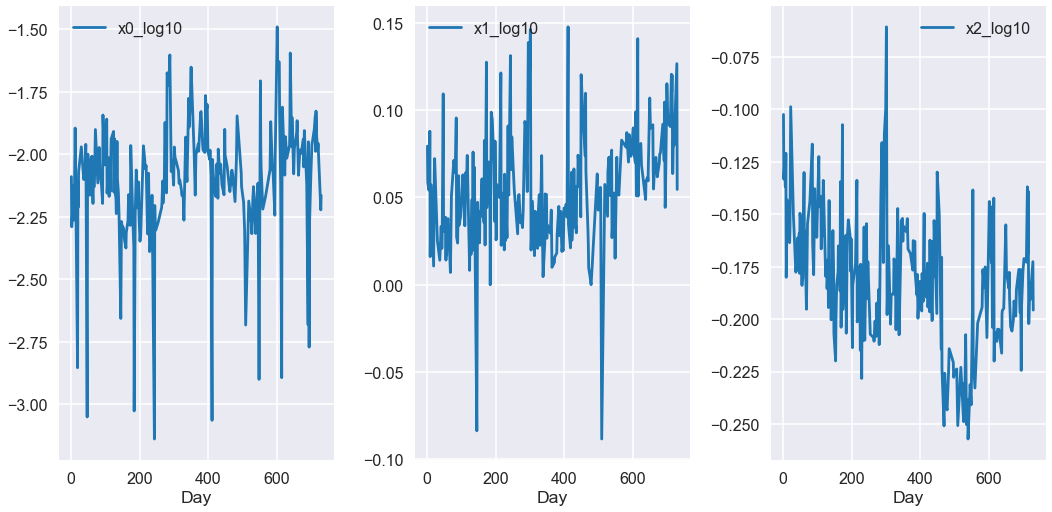

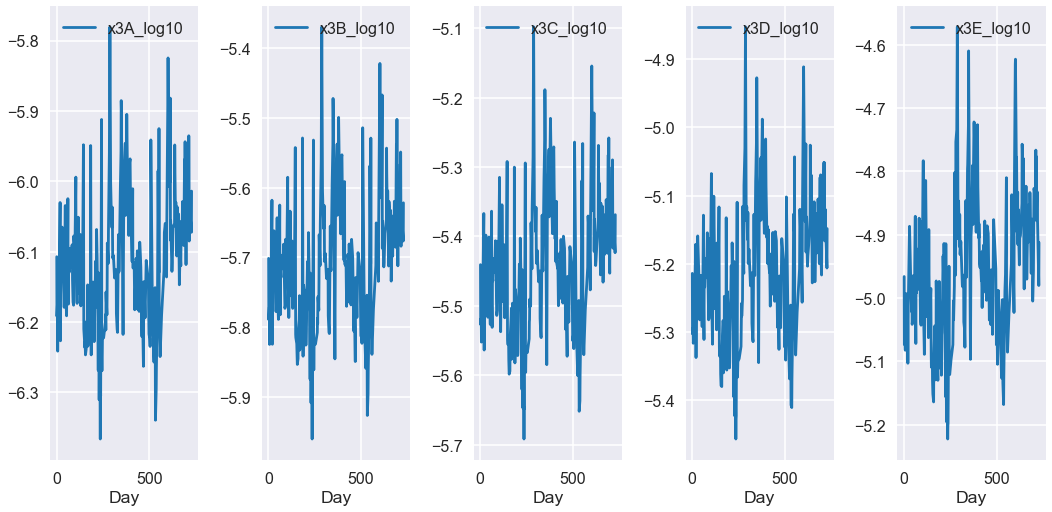

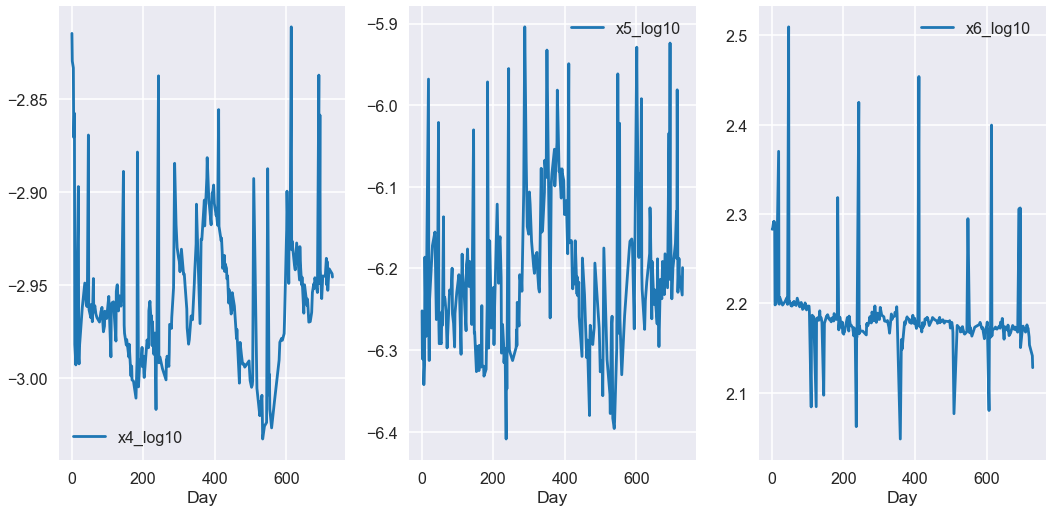

In [83]:
fig,ax = plt.subplots(nrows=1, ncols=len(feat_1), figsize=[15,7.5])
for ix, feat in enumerate(feat_1):
    df.groupby('Day').mean().plot(y=feat + '_log10', ax=ax[ix])
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_2), figsize=[15,7.5])
for ix, feat in enumerate(feat_2):
    df.groupby('Day').mean().plot(y=feat + '_log10', ax=ax[ix])
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_3), figsize=[15,7.5])
for ix, feat in enumerate(feat_3):
    df.groupby('Day').mean().plot(y=feat + '_log10', ax=ax[ix])
fig.tight_layout()

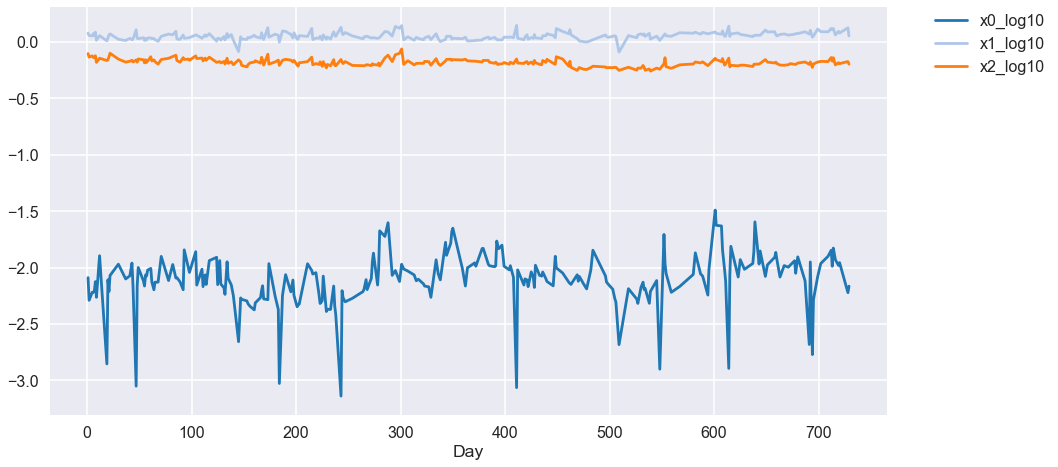

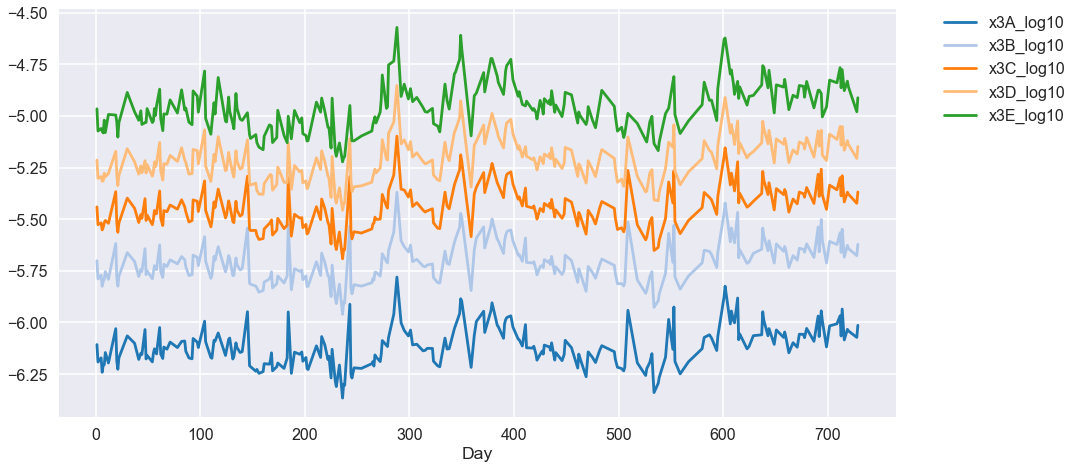

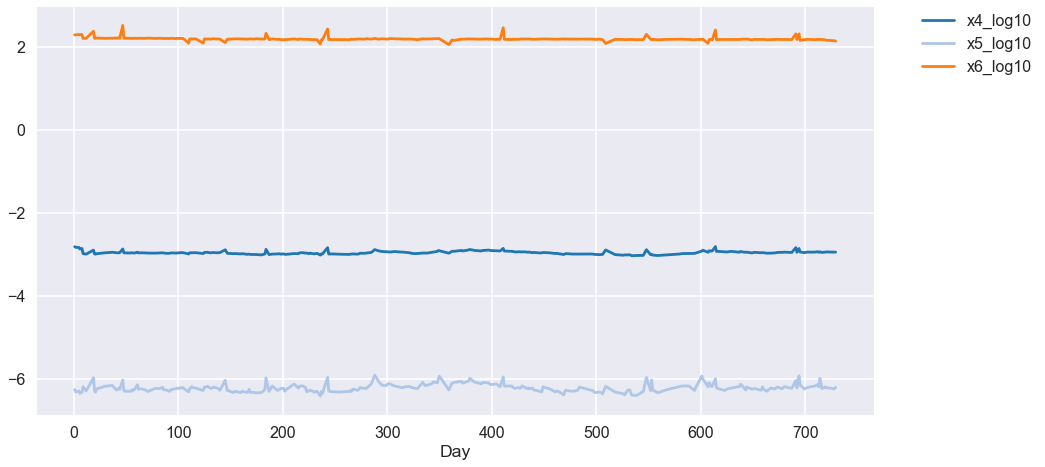

In [62]:
# According to the feature descriptions, the features group into 3 natural categories
feat_1 = ['x0', 'x1', 'x2']
feat_2 = ['x3A', 'x3B', 'x3C', 'x3D', 'x3E' ]
feat_3 = ['x4', 'x5', 'x6']

sns.set_palette(sns.color_palette('tab20', 20))
df.groupby(by='Day').mean()[[f+'_log10' for f in feat_1]].plot(figsize=[15,7.5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.set_palette(sns.color_palette('tab20', 20))
df.groupby(by='Day').mean()[[f+'_log10' for f in feat_2]].plot(figsize=[15,7.5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.set_palette(sns.color_palette('tab20', 20))
df.groupby(by='Day').mean()[[f+'_log10' for f in feat_3]].plot(figsize=[15,7.5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Time series by stock

As there are a large number of stocks, initially we will just look at a random subsample.

In [79]:
rand_stocks = np.random.randint(low=0, high=df.Stock.max()+1, size=(100))

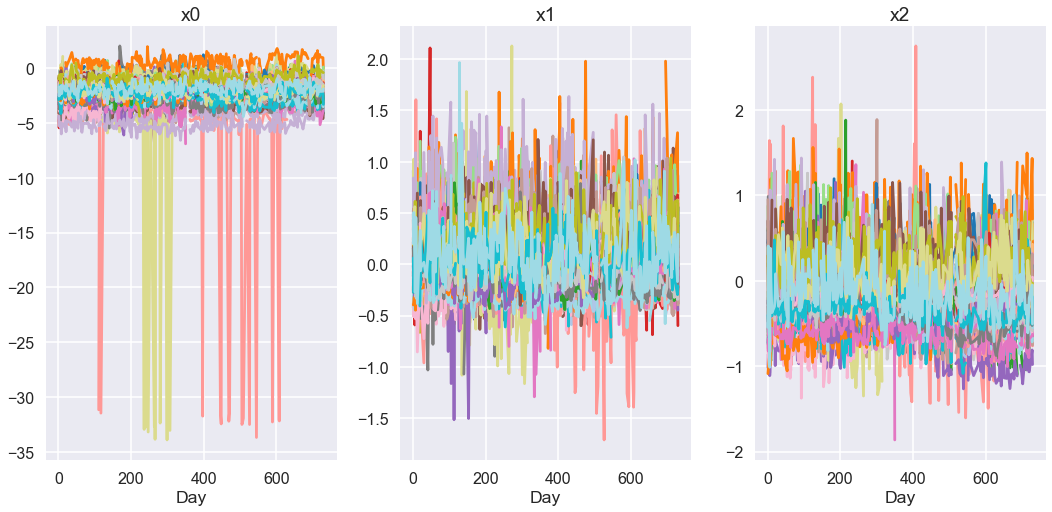

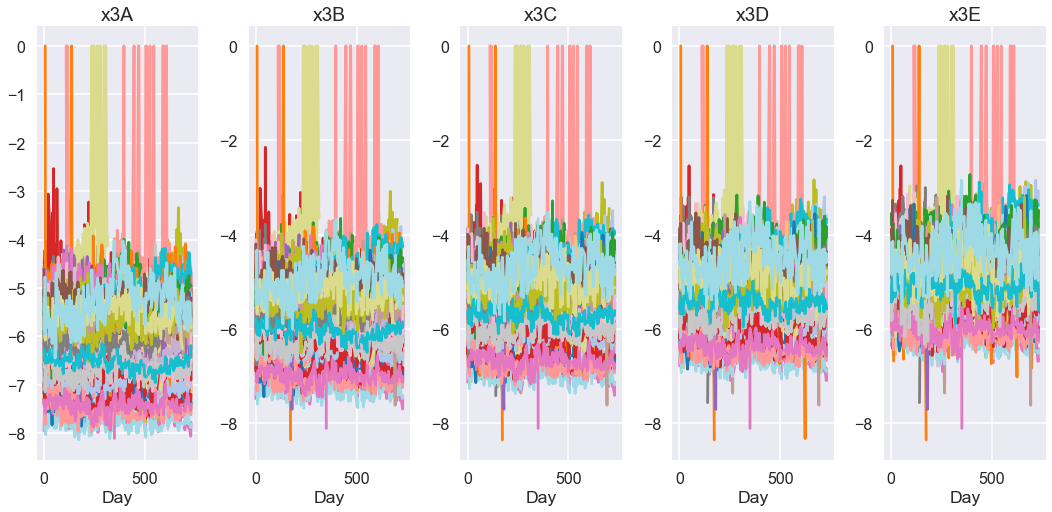

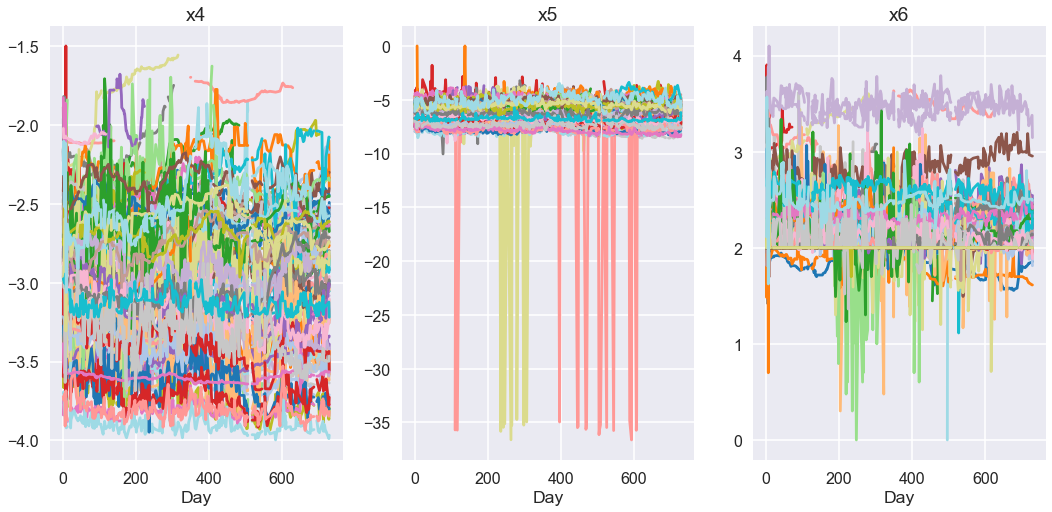

In [92]:
fig,ax = plt.subplots(nrows=1, ncols=len(feat_1), figsize=[15,7.5])
for ix, feat in enumerate(feat_1):
    df.groupby(['Day','Stock'])[feat + '_log10'].mean().unstack().iloc[:,rand_stocks].plot(figsize=[15,7.5], ax=ax[ix])
    ax[ix].legend_.remove()
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_2), figsize=[15,7.5])
for ix, feat in enumerate(feat_2):
    df.groupby(['Day','Stock'])[feat + '_log10'].mean().unstack().iloc[:,rand_stocks].plot(figsize=[15,7.5], ax=ax[ix])
    ax[ix].legend_.remove()
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_3), figsize=[15,7.5])
for ix, feat in enumerate(feat_3):
    df.groupby(['Day','Stock'])[feat + '_log10'].mean().unstack().iloc[:,rand_stocks].plot(figsize=[15,7.5], ax=ax[ix])
    ax[ix].legend_.remove()
    ax[ix].set_title(feat)
fig.tight_layout()